# Profile COG internals

Profile cog internal estructure with reading time of the rio-tiler `Reader`  

In [6]:
from rio_tiler.profiles import img_profiles
from rio_tiler.io import Reader
import mercantile
import random
import time
from tqdm import tqdm
import numpy as np

import matplotlib.pyplot as plt

In [7]:
def read_tile(url, x, y, z, band):
    with Reader(url) as cog:
        image = cog.tile(x, y, z, indexes=band)
        image.data_as_image()

def experiment(url, n_experiments):
    results = []
    for _ in tqdm(range(n_experiments)):
        tile = mercantile.tile(random.uniform(-180, 180), random.uniform(-85.051, 85.051), random.randint(1, 10))
        before = time.time()
        read_tile(url,*tile, random.randint(1, 16))
        after = time.time()
        results.append(after - before)
    return results

def show_results(url):
    res = experiment(url, 2000)
    print(f"Average time: {np.mean(res)}")
    print(f"Median time: {np.median(res)}")
    plt.hist(res, bins=20)
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:40<00:00, 48.99it/s]


Average time: 0.020273021817207335
Median time: 0.02017819881439209


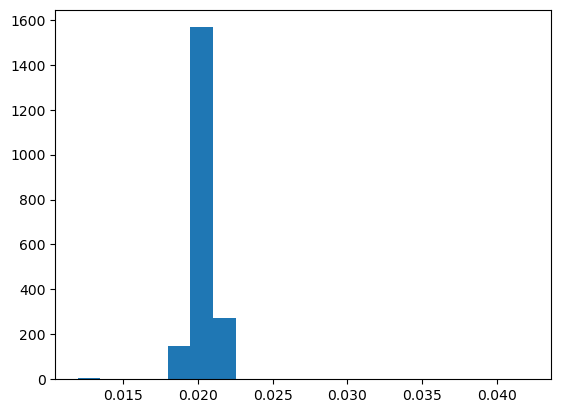

In [8]:
url = "cogs/foodscapes_stack_cog_lzw.tif"  # band interleaved, lzw compression, mercator aligned tiles
show_results(url)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:44<00:00, 44.94it/s]


Average time: 0.02210500502586365
Median time: 0.02246236801147461


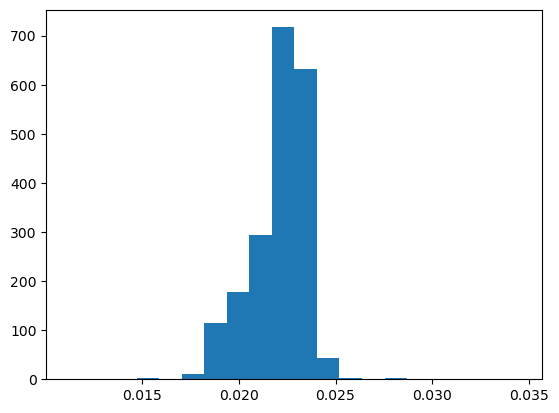

In [9]:
# pixel interleaved, deflate compression
show_results("cogs/foodscapes_stack_cog.tif")

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:45<00:00, 43.93it/s]


Average time: 0.022631100177764894
Median time: 0.02169954776763916


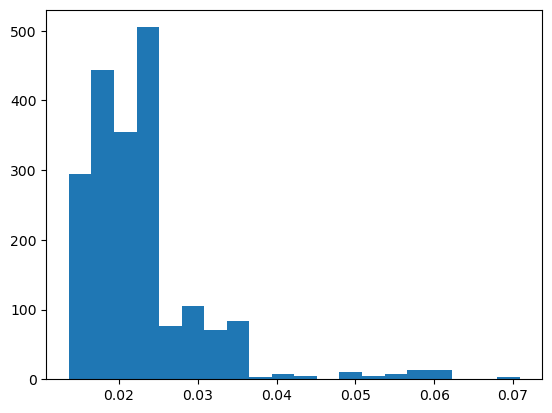

In [10]:
# pixel interleave, deflate, non aligned grid
show_results(
    "/home/biel/Vizzuality/dev/sci_team_data_bank/Projects/foodscapes/data/all/cogs/foodscapes_stack_cog_nonweb.tif"
)